<a href="https://colab.research.google.com/github/nyayuchika/pcd-coursework/blob/master/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Input citra

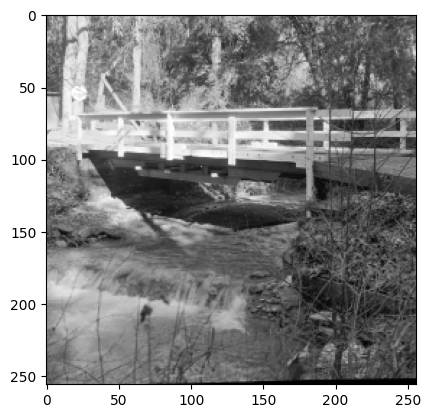

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bridge.png',0)
plt.imshow(img, cmap='gray')

In [4]:
print(img.shape)

(256, 256)


In [5]:
print(img)

[[ 94  96 113 ... 145 139 107]
 [ 91 125 120 ...  92 105 110]
 [ 87 119 144 ...  87 101 102]
 ...
 [101  98  81 ...   0   0   0]
 [115 110  88 ...   0   0   0]
 [101 107  99 ...   0   0   0]]


#Fungsi konvolusi



In [6]:
def konvolusi(image, kernel):
  baris_img, kolom_img = image.shape
  baris_kernel, kolom_kernel = kernel.shape

  #kernel berupa matriks persegi dan harus ganjil
  baris_padding = int((baris_kernel - 1) / 2)
  kolom_padding = int((kolom_kernel - 1) / 2)

  baris_baru = baris_img + 2 * baris_padding
  kolom_baru = kolom_img + 2 * kolom_padding

  #bentuk matriks zero padding
  padding = []
  for i in range(baris_baru):
    membentuk_padding = []
    for j in range(kolom_baru):
      membentuk_padding.append(0)
    padding.append(membentuk_padding)

  #proses padding matriks dengan zero padding
  for i in range(baris_img):
    for j in range(kolom_img):
      padding[i+baris_padding][j+kolom_padding] = image[i][j]

  #proses konvolusi
  hasil_konvolusi = []
  for i in range(baris_img):
    membentuk_hasil_konvolusi = []
    for j in range(kolom_img):
      membentuk_hasil_konvolusi.append(0)
    hasil_konvolusi.append(membentuk_hasil_konvolusi)

  for y in range(baris_img):
    for x in range(kolom_img):
      total = 0
      for i in range(baris_kernel):
        for j in range(kolom_kernel):
          total += kernel[i][j] * padding[y+i][x+j]
      hasil_konvolusi[y][x] = total
  return hasil_konvolusi, padding

#Spatial Filtering

In [68]:
#Kernel
import numpy as np

#mean filter
mean_kernel = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]])
print(f'Mean Filter: \n',mean_kernel,'\n')

#gaussian filter
gaussian_kernel = np.array([[1/16, 2/16, 1/16],
                            [2/16, 4/16, 2/16],
                            [1/16, 2/16, 1/16]])
print(f'Gaussian Filter: \n',gaussian_kernel,'\n')

#laplacian kernel
laplacian_kernel = np.array([[1, 1, 1],
                          [1, -8, 1],
                          [1, 1, 1]])
print(f'Laplacian filter: \n',laplacian_kernel,'\n')

Mean Filter: 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]] 

Gaussian Filter: 
 [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]] 

Laplacian filter: 
 [[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] 



In [73]:
padding = konvolusi(img, mean_kernel)[1]
print(f'Matriks hasil zero padding: \n', np.array(padding))

Matriks hasil zero padding: 
 [[  0   0   0 ...   0   0   0]
 [  0  94  96 ... 139 107   0]
 [  0  91 125 ... 105 110   0]
 ...
 [  0 115 110 ...   0   0   0]
 [  0 101 107 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [69]:
#Operasi konvolusi dengan spatial filtering
mean_konvolusi = konvolusi(img, mean_kernel)[0]
print(f"Matriks hasil konvolusi dengan mean filter: \n", np.array(mean_konvolusi),'\n')

gaussian_konvolusi = konvolusi(img, gaussian_kernel)[0]
print(f"Matriks hasil konvolusi dengan gaussian filter: \n", np.array(gaussian_konvolusi),'\n')

laplacian_konvolusi = konvolusi(img, laplacian_kernel)[0]
print(f"Matriks hasil konvolusi dengan laplacian filter: \n", np.array(laplacian_konvolusi),'\n')

Matriks hasil konvolusi dengan mean filter: 
 [[ 45.11111111  71.          82.44444444 ...  77.88888889  77.55555556
   51.22222222]
 [ 68.         109.88888889 125.22222222 ... 108.88888889 109.77777778
   73.77777778]
 [ 67.         112.         124.11111111 ...  98.77777778 103.55555556
   71.44444444]
 ...
 [ 66.88888889  94.44444444  89.44444444 ...   1.55555556   1.22222222
    0.77777778]
 [ 70.22222222 100.          95.55555556 ...   0.           0.
    0.        ]
 [ 48.11111111  68.88888889  65.88888889 ...   0.           0.
    0.        ]] 

Matriks hasil konvolusi dengan gaussian filter: 
 [[ 54.6875  78.6875  89.5    ...  93.8125  92.      64.4375]
 [ 74.4375 111.875  126.375  ... 104.9375 109.0625  81.75  ]
 [ 72.625  113.375  128.1875 ...  96.5    103.0625  79.0625]
 ...
 [ 76.0625  94.6875  87.5625 ...   1.125    0.875    0.6875]
 [ 80.5625 102.375   94.25   ...   0.       0.       0.    ]
 [ 59.875   78.1875  73.75   ...   0.       0.       0.    ]] 

Matriks hasil ko

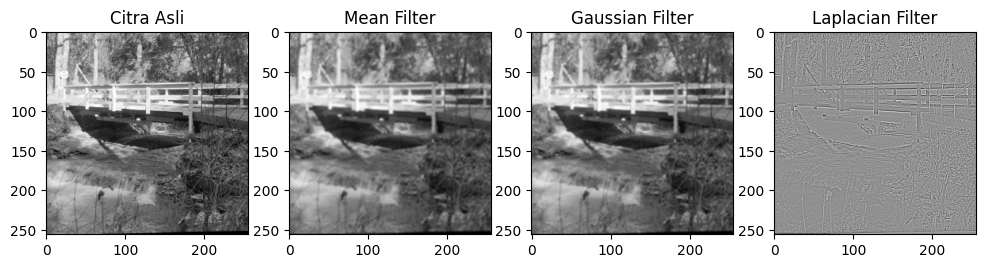

In [72]:
#Visualisasi citra hasil spatial filtering
plt.figure(figsize=(12,6))

#citra asli
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title("Citra Asli")

#mean filter
plt.subplot(1,4,2)
plt.imshow(mean_konvolusi, cmap='gray')
plt.title("Mean Filter")

#gaussian filter
plt.subplot(1,4,3)
plt.imshow(gaussian_konvolusi, cmap='gray')
plt.title("Gaussian Filter")

#laplacian filter
plt.subplot(1,4,4)
plt.imshow(laplacian_konvolusi, cmap='gray')
plt.title("Laplacian Filter")

plt.show()


Diskusi:

#Sharpened with blur operation

In [74]:
baris_img, kolom_img = img.shape

In [75]:
print(baris_img)
print(kolom_img)

256
256


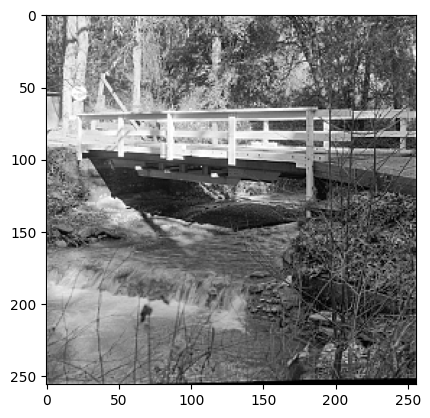

In [79]:
sharpened = []
detail_citra = []
for i in range(baris_img):
  membentuk_sharpened = []
  membentuk_detail = []
  for j in range(kolom_img):
    detail = img[i][j] - gaussian_konvolusi[i][j] #(I-B)
    operasi_sharpened = img[i][j] + detail #I+(I-B)
    if operasi_sharpened < 0:
      operasi_sharpened = 0
    elif operasi_sharpened > 255:
      operasi_sharpened = 255
    membentuk_sharpened.append(operasi_sharpened)
    membentuk_detail.append(detail)
  sharpened.append(membentuk_sharpened)
  detail_citra.append(membentuk_detail)

plt.imshow(sharpened, cmap='gray')

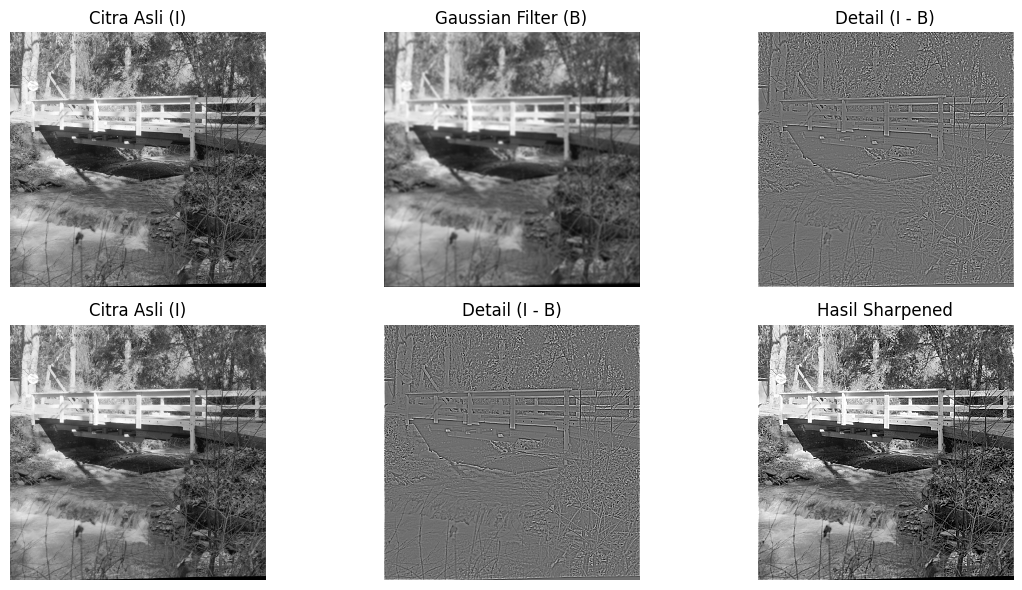

In [89]:
#Visualisasi citra hasil sharpened with blur operation
plt.figure(figsize=(12,6))

#Baris Pertama
#citra asli
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Citra Asli (I)")
plt.axis('off')

#gaussian filter
plt.subplot(2,3,2)
plt.imshow(gaussian_konvolusi, cmap='gray')
plt.title("Gaussian Filter (B)")
plt.axis('off')

#detail dari I - B
plt.subplot(2,3,3)
plt.imshow(detail_citra, cmap='gray')
plt.title("Detail (I - B)")
plt.axis('off')

#Baris Kedua
#citra asli
plt.subplot(2,3,4)
plt.imshow(img, cmap='gray')
plt.title("Citra Asli (I)")
plt.axis('off')

#detail dari I - B
plt.subplot(2,3,5)
plt.imshow(detail_citra, cmap='gray')
plt.title("Detail (I - B)")
plt.axis('off')

#hasil sharpened
plt.subplot(2,3,6)
plt.imshow(sharpened, cmap='gray')
plt.title("Hasil Sharpened")
plt.axis('off')

plt.tight_layout()
plt.show()

#Discussion